In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [22]:
train_df = pd.read_csv('PUBG/train_V2.csv')

In [3]:
train_df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [4]:
train_df.drop('Id', axis=1, inplace=True)

In [5]:
cat_features = ['groupId', 'matchId', 'matchType']

In [6]:
num_features = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc']

In [7]:
train_df.nunique()

groupId            2026745
matchId              47965
assists                 20
boosts                  27
damageDealt          29916
DBNOs                   39
headshotKills           34
heals                   63
killPlace              101
killPoints            1707
kills                   58
killStreaks             18
longestKill          28284
matchDuration         1267
matchType               16
maxPlace               100
numGroups              100
rankPoints            2262
revives                 25
rideDistance         33562
roadKills               14
swimDistance         28345
teamKills               11
vehicleDestroys          6
walkDistance         38599
weaponsAcquired         97
winPoints             1447
winPlacePerc          3000
dtype: int64

In [8]:
train_df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   ...  1.646590e-01  6.061157e+02  3.496091e-03  4.509322e+00   
std    ...  4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  4.446966e+06     4.446966e+06  4.446966e+06     4.446966e+06   
mean   2.386841e-02     7.918208e-03  1.154218e+03     3.660488e+00   
std    1.673935e-01     9.261157e-02  1.183497e+03     2.456544e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.551000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.856000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.976000e+03     5.000000e+00   
max    1.200000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  4.446966e+06  4.446965e+06  
mean   6.064601e+02  4.728216e-01  
std    7.397004e+02  3.074050e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.013000e+03  1.000000e+00  

[8 rows x 25 columns]

In [9]:
train_df.shape

(4446966, 28)

Пропущенные значения:

CPU times: user 1.12 s, sys: 27.7 ms, total: 1.15 s
Wall time: 1.28 s


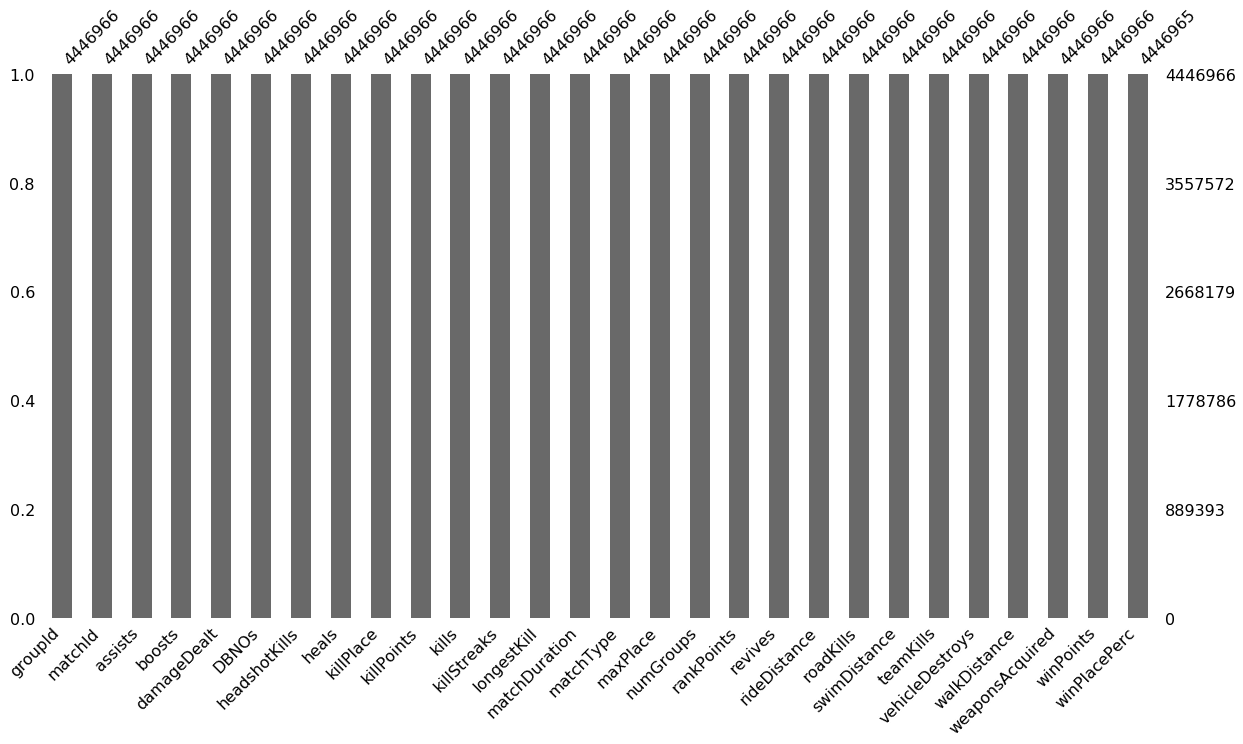

In [10]:
%%time
msno.bar(train_df, figsize=(20, 10), sort=None)

In [11]:
%%time
train_df[train_df.duplicated()]

CPU times: user 8.45 s, sys: 5.15 s, total: 13.6 s
Wall time: 14 s


Empty DataFrame
Columns: [groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc]
Index: []

[0 rows x 28 columns]

### EDA
Проведём EDA на подвыборке из 10000 элементов:

In [12]:
EDA_df = train_df.sample(10000, random_state=42)

In [13]:
EDA_df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.232700      1.092100    131.247971      0.660800       0.227600   
std        0.579642      1.697618    174.615834      1.126086       0.596686   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000     87.020000      0.000000       0.000000   
75%        0.000000      2.000000    186.925000      1.000000       0.000000   
max        8.000000     14.000000   4014.000000     14.000000      10.000000   

              heals     killPlace   killPoints        kills   killStreaks  \
count  10000.000000  10000.000000  10000.00000  10000.00000  10000.000000   
mean       1.352900     47.568600    506.03950      0.93120      0.550800   
std        2.660915     27.433059    627.01575      1.63001      0.714612   
min        0.000000      1.000000      0.00000      0.00000      0.000000   
25%        0.000000     24.000000      0.00000      0.00000      0.000000   
50%        0.000000     48.000000      0.00000      0.00000      0.000000   
75%        2.000000     72.000000   1170.00000      1.00000      1.000000   
max       48.000000    100.000000   2053.00000     46.00000      6.000000   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.166500    576.993998      0.003500      4.500890   
std    ...      0.481249   1452.320882      0.095334     30.375404   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      6.000000  14000.000000      8.000000    684.800000   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  10000.000000     10000.000000  10000.000000     10000.000000   
mean       0.022700         0.007100   1144.854716         3.659500   
std        0.162442         0.086315   1172.239185         2.440728   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000    157.075000         2.000000   
50%        0.000000         0.000000    689.850000         3.000000   
75%        0.000000         0.000000   1961.000000         5.000000   
max        3.000000         2.000000   8959.000000        37.000000   

          winPoints  winPlacePerc  
count  10000.000000  10000.000000  
mean     608.689800      0.471126  
std      740.236493      0.306180  
min        0.000000      0.000000  
25%        0.000000      0.200000  
50%        0.000000      0.458300  
75%     1495.000000      0.740700  
max     1885.000000      1.000000  

[8 rows x 25 columns]

/home/nikolai/Projects/MIPT-ML-Fall-2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


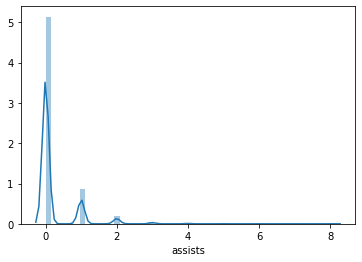

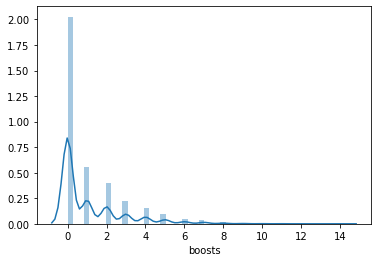

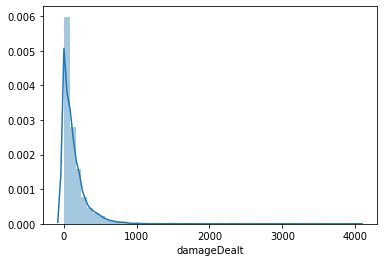

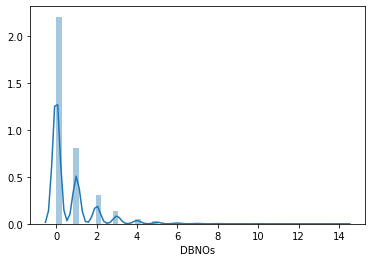

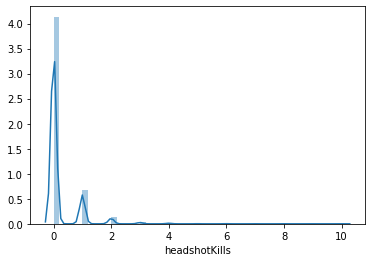

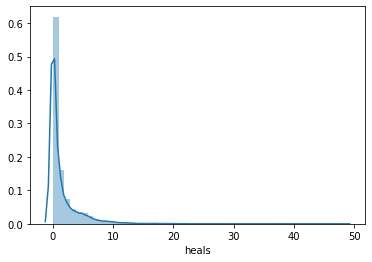

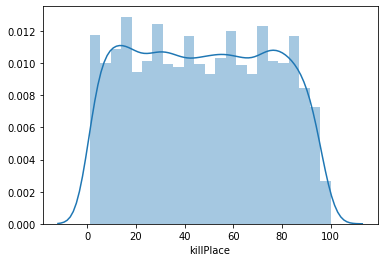

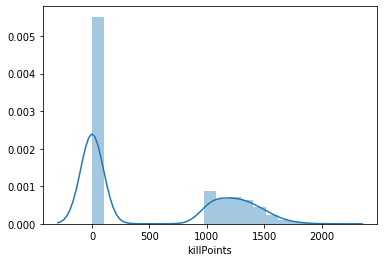

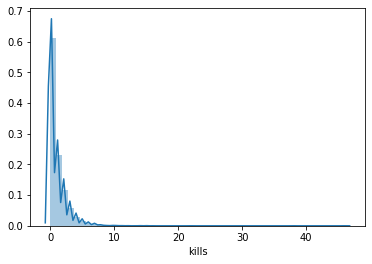

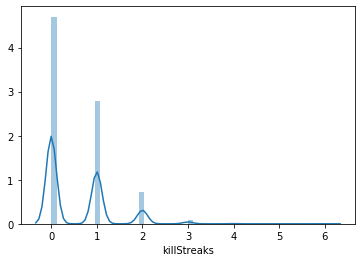

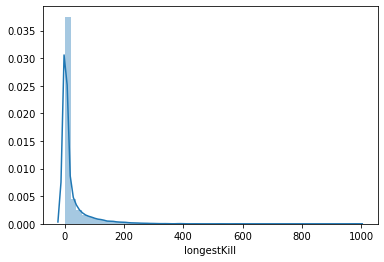

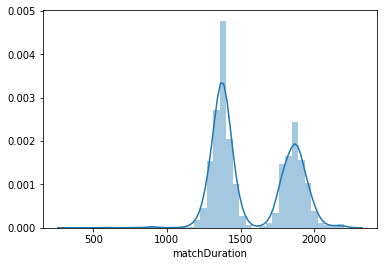

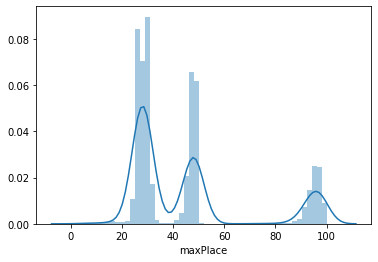

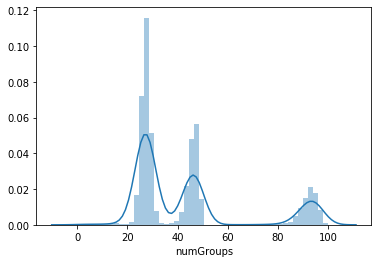

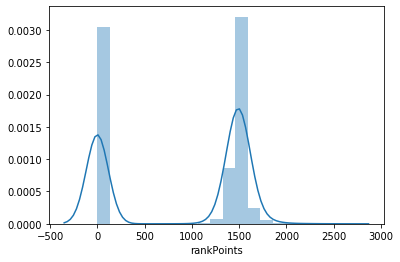

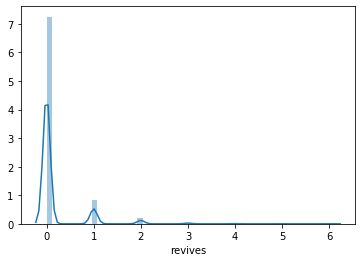

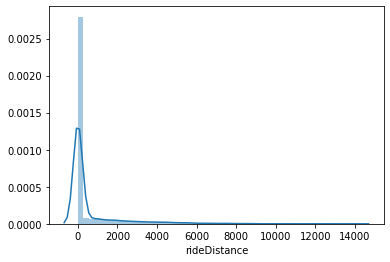

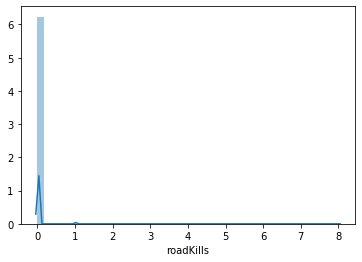

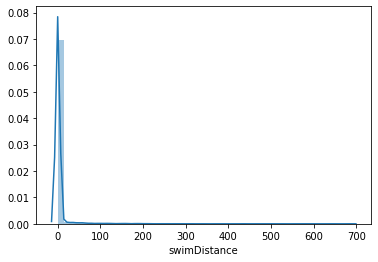

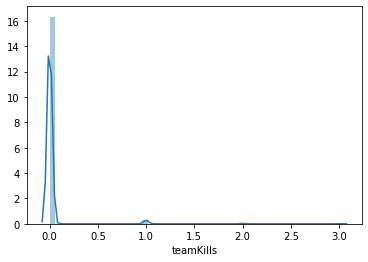

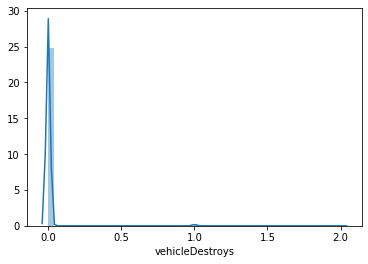

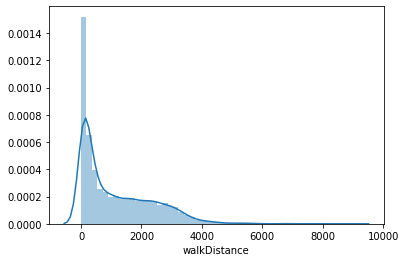

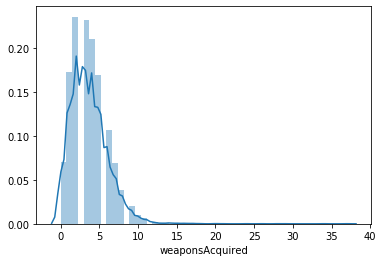

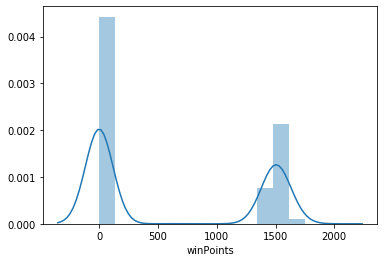

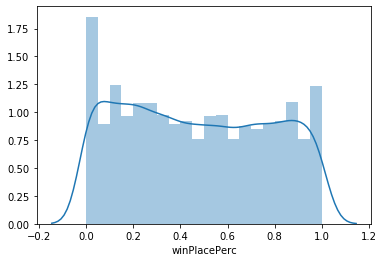

In [14]:
for column in num_features:
    plt.figure()
    sns.distplot(EDA_df[column])

Часть распределений имеет несколько пиков. У многих - пики в нуле. Имеет смысл попробовать использовать произведения признаков и логарифмы признаков (многие распределения "скошены").

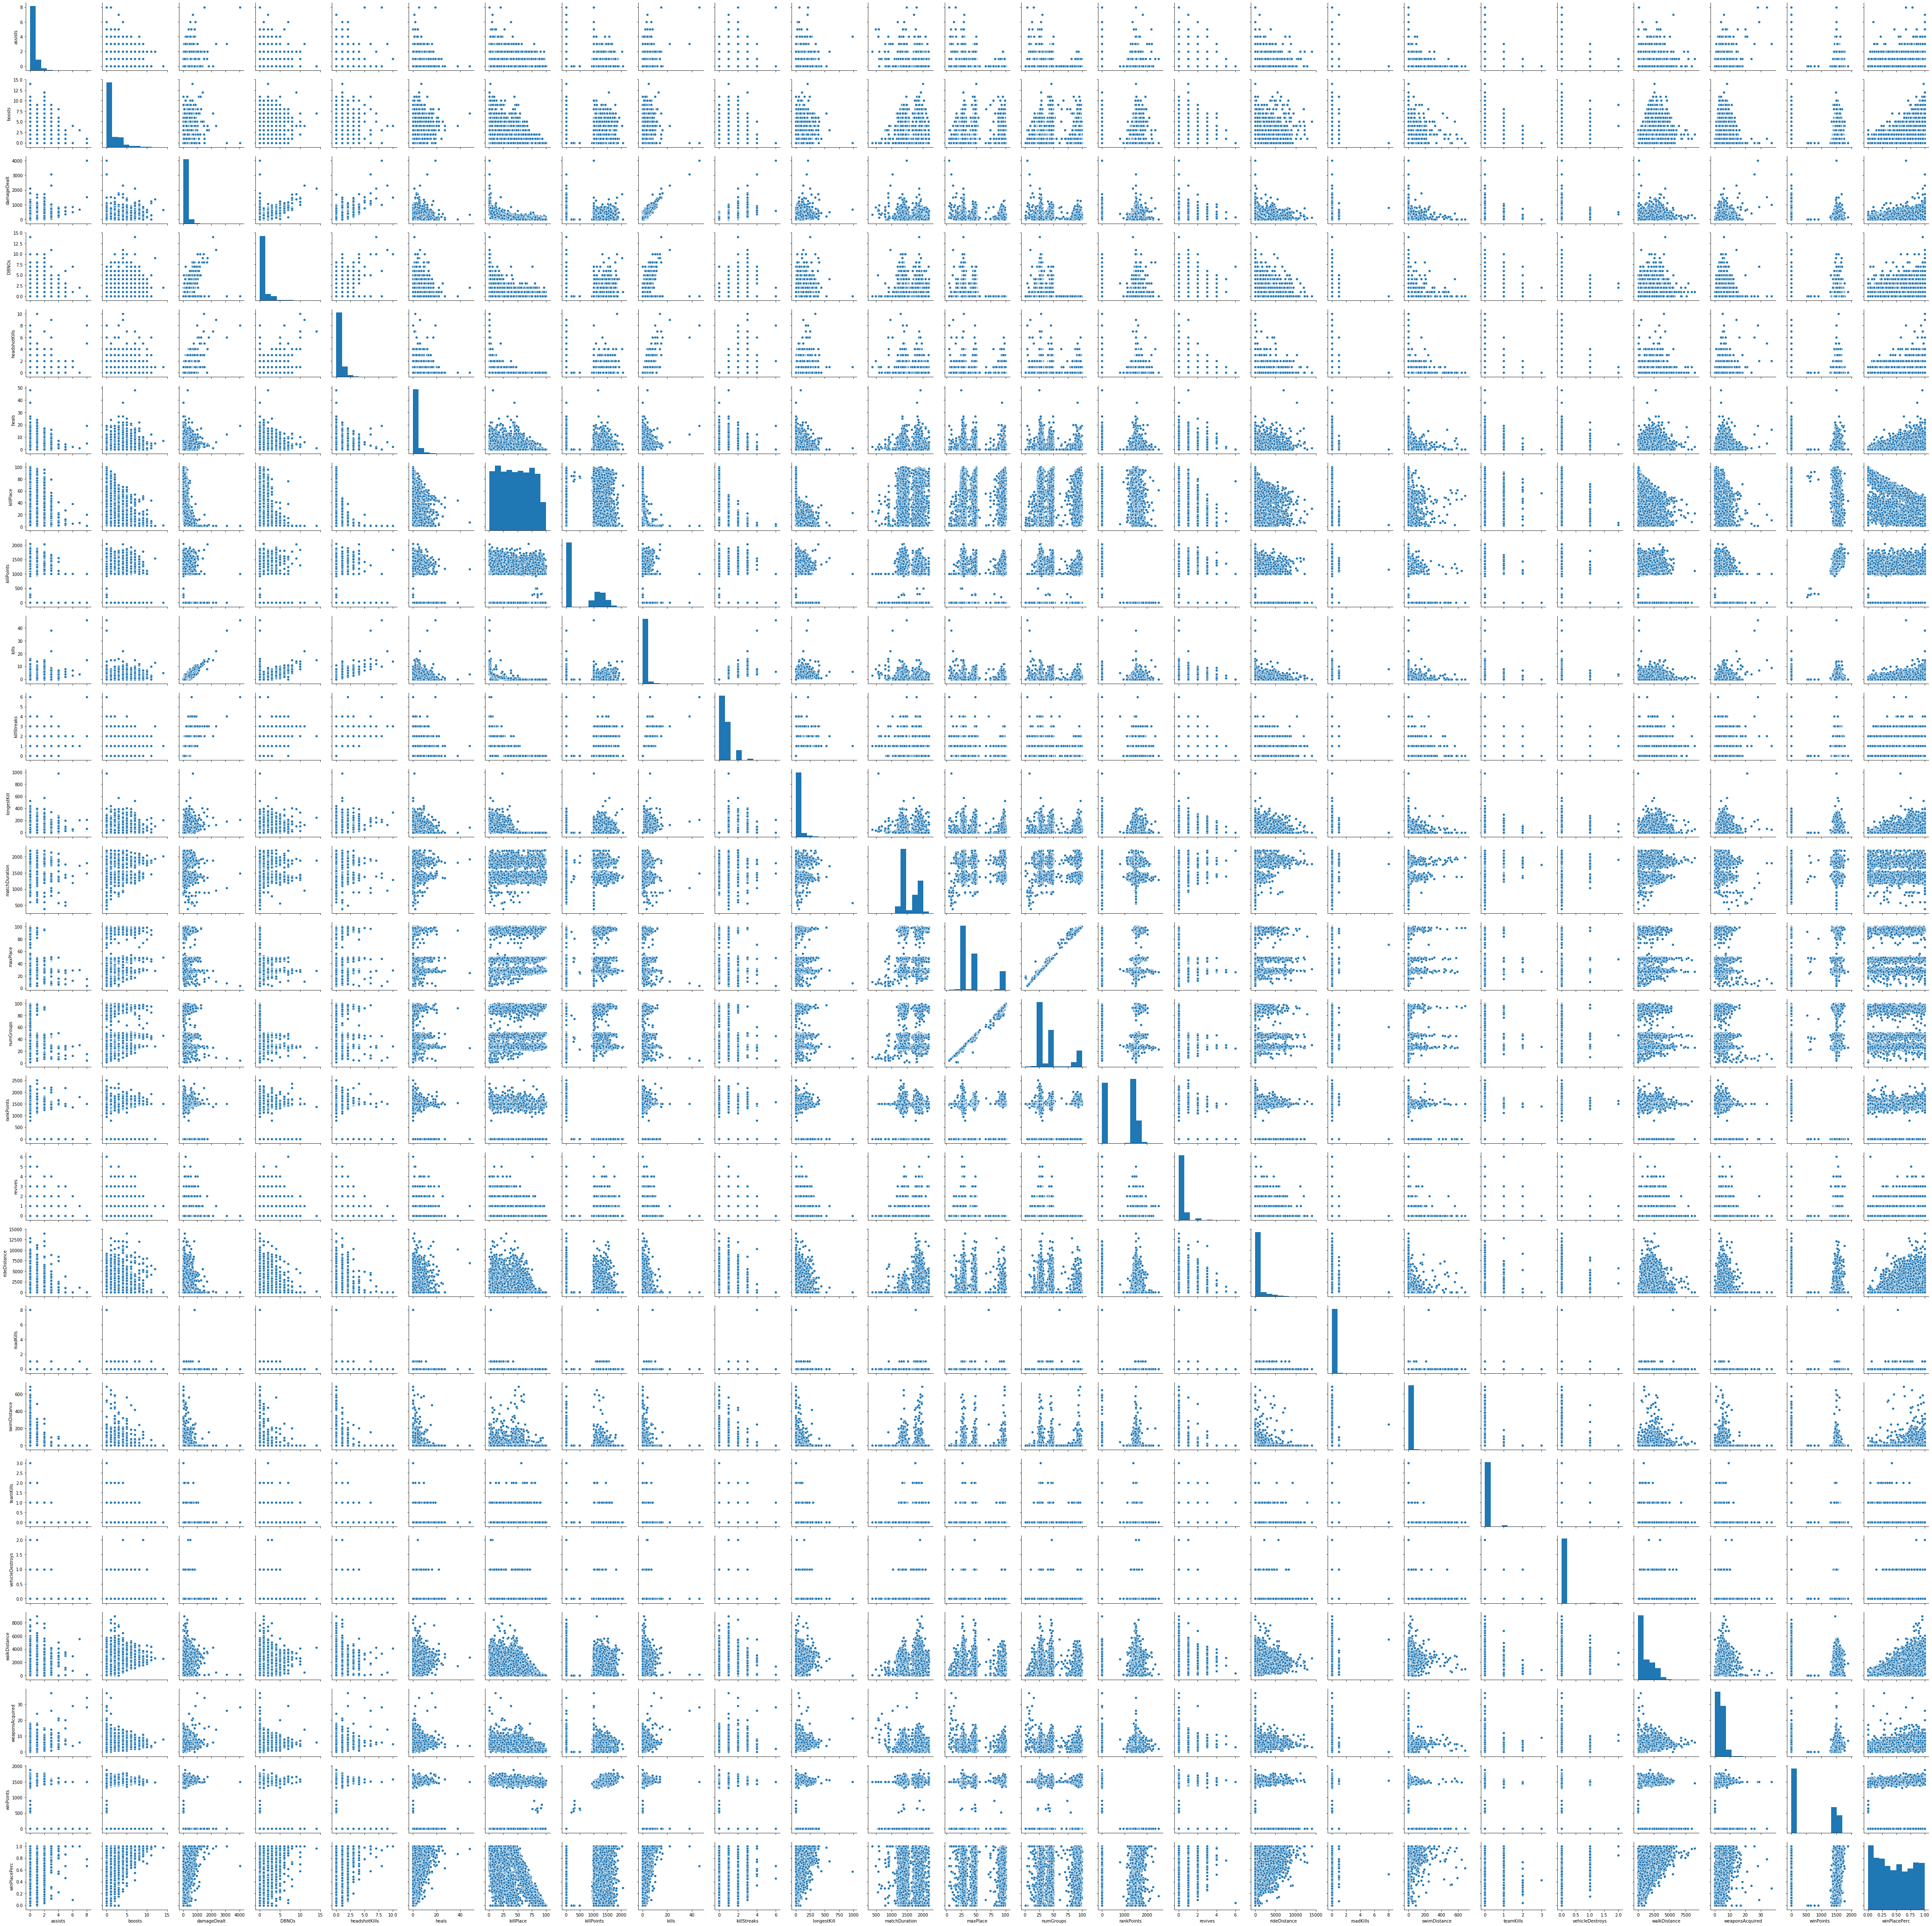

In [15]:
sns.pairplot(EDA_df)

Видно что для нескольких признаков таргет задаёт линейные ограничения. MaxPlace и NumGroups линейно зависят. Выбросы -- судя по всему, парные места.

### Генерация признаков

Не хватает памяти, поэтому пока в качестве трейна будем использовать случайные 100 000 строк

In [23]:
train_df = train_df.sample(100000, random_state=42)

In [25]:
for i, feat_a in enumerate(num_features[:-1]):
    train_df[f'log(1 + {feat_a})'] = np.log1p(train_df[feat_a])
    for feat_b in num_features[i:-1]:
        train_df[f'{feat_a}*{feat_b}'] = train_df[feat_a] * train_df[feat_b]

### Валидация и результат

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
!pip install lightgbm

In [28]:
from lightgbm import LGBMRegressor

In [34]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('winPlacePerc', axis=1), train_df['winPlacePerc'], test_size=0.2, random_state=42)

In [36]:
model = LGBMRegressor(m_estimators=500, )

In [43]:
model.fit(X_train[num_features[:-1]], y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(model.predict(X_val[num_features[:-1]]), y_val)

0.060891538349379756

Сравним с оптимальной константой:

In [48]:
mean_absolute_error([y_train.median()]*y_val.shape[0], y_val)

0.26860911000000004